### Exercise 3.2
#### Neural networks for regression problems: 

- Use the dataset from exercise 1.4 and run the same experiments using neural networks and compare with linear regression for the heating load. https://edstem.org/au/courses/6212/lessons/13871/slides/111781

- Extend the model in Part 1 so that it can predict both the heating and cooling load. Therefore, you need to have 2 output neurons with linear outputs. 

- Apply neural networks for the Abalone dataset given in Assesment 1 and compare with linear regression results. 

- Ensure that you do 30 experiments in all the above tasks. In each experiment, you can have a different train/test split. 

corr matrix of the data read: 
 [ 0.62227218 -0.65812023  0.45567116 -0.86182825  0.88943067 -0.00258653
  0.269841    0.08736759  1.          0.97586181]


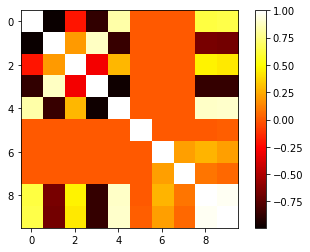

corr matrix of the data read: 
 [ 0.62227218 -0.65812023  0.45567116 -0.86182825  0.88943067 -0.00258653
  0.269841    0.08736759  1.          0.97586181]


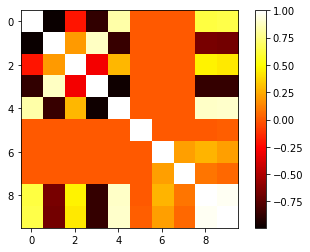

corr matrix of the data read: 
 [ 0.62227218 -0.65812023  0.45567116 -0.86182825  0.88943067 -0.00258653
  0.269841    0.08736759  1.          0.97586181]


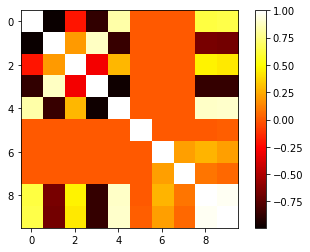

corr matrix of the data read: 
 [ 0.62227218 -0.65812023  0.45567116 -0.86182825  0.88943067 -0.00258653
  0.269841    0.08736759  1.          0.97586181]


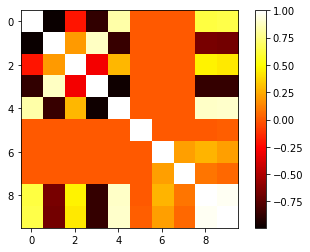

corr matrix of the data read: 
 [ 0.62227218 -0.65812023  0.45567116 -0.86182825  0.88943067 -0.00258653
  0.269841    0.08736759  1.          0.97586181]


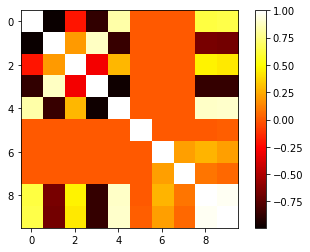

corr matrix of the data read: 
 [ 0.62227218 -0.65812023  0.45567116 -0.86182825  0.88943067 -0.00258653
  0.269841    0.08736759  1.          0.97586181]


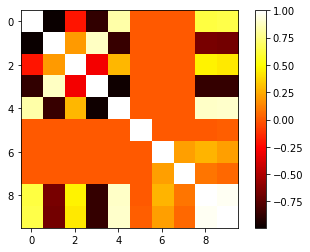

corr matrix of the data read: 
 [ 0.62227218 -0.65812023  0.45567116 -0.86182825  0.88943067 -0.00258653
  0.269841    0.08736759  1.          0.97586181]


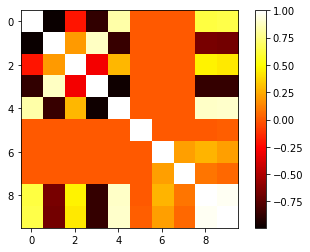

corr matrix of the data read: 
 [ 0.62227218 -0.65812023  0.45567116 -0.86182825  0.88943067 -0.00258653
  0.269841    0.08736759  1.          0.97586181]


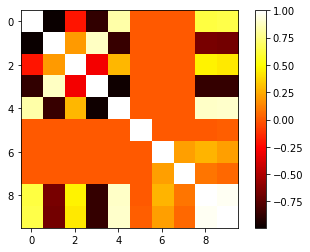

corr matrix of the data read: 
 [ 0.62227218 -0.65812023  0.45567116 -0.86182825  0.88943067 -0.00258653
  0.269841    0.08736759  1.          0.97586181]


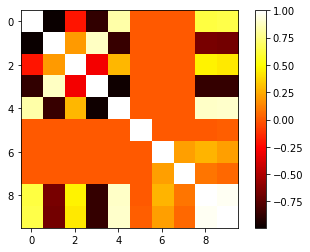

corr matrix of the data read: 
 [ 0.62227218 -0.65812023  0.45567116 -0.86182825  0.88943067 -0.00258653
  0.269841    0.08736759  1.          0.97586181]


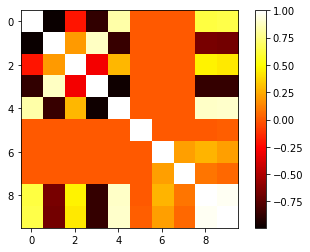

RMSE: 
 [4.03749999 4.25418482 4.12330359 4.97319203 3.42518671 4.86017693
 3.81503483 4.43735302 3.92752513 3.76154255] 

R-squared: 
 [0.82597601 0.80596537 0.81801196 0.76466931 0.87171007 0.73479988
 0.84307222 0.79456596 0.83913377 0.8561224 ] 

mean_rmse, std_rmse:  4.161499961670599 0.4610227013836271 

mean_rsq, std_rsq:  0.8154026924623381 0.03983705146995388


<Figure size 432x288 with 0 Axes>

In [7]:
import random
import numpy as np
import matplotlib.pyplot as plt
from numpy import * 
from scipy.stats import pearsonr
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.metrics import accuracy_score 
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor


def get_data(normalise, i): 
    data = genfromtxt('datasets/ENB2012_data.csv', delimiter=",")   # in case of csv data
    data_X = data[:, 0:8]     # all features 0-7
    #data_X = data[:, [1]]    # one feature
    #data_X = data[:, [0,3]]  # two features   

    if normalise == True:
        transformer = Normalizer().fit(data_X)     # fit does nothing
        data_X = transformer.transform(data_X)

    #cov_mat = np.cov(data.T)

    corr_mat = np.corrcoef(data.T)
    print('corr matrix of the data read: \n', corr_mat[:, 8])

    plt.imshow(corr_mat, cmap='hot', interpolation='nearest') 
    plt.colorbar()
    #plt.savefig('pictures/cov_heatmap.png')
    plt.show()
    plt.clf()

    #data_y = data[:, 8]      # target - last col is selected from data

    data_y = data[:, [8,9]]   # both heating and cooling load

    percent_test = 0.4
    '''testsize = int(percent_test * data_X.shape[0]) 
    X_train = data_X[:-testsize]
    X_test = data_X[-testsize:] 
    y_train = data_y[:-testsize]
    y_test = data_y[-testsize:]'''

    # another way you can use scikit-learn train test split with random state
    X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size=percent_test, random_state=i)

    return X_train, X_test, y_train, y_test
     
def scikit_nn_mod(X_train, X_test, y_train, y_test):  
    mlp_model = MLPRegressor(hidden_layer_sizes=(30, ), max_iter=2000)
 
    # Train the model using the training sets
    mlp_model.fit(X_train, y_train)

    # Make predictions using the testing set
    y_pred = mlp_model.predict(X_test)
 
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))  # or, mean_squared_error(y_test, y_pred, squared=False)
    rsquared = r2_score(y_test, y_pred) 
 
    '''residuals = y_pred - y_test
    plt.plot(residuals, linewidth=1) 
    plt.savefig('scikit_linear.png')'''

    return rmse, rsquared


def scikit_linear_mod(X_train, X_test, y_train, y_test):  
    regr = linear_model.LinearRegression()
 
    # Train the model using the training sets
    regr.fit(X_train, y_train)

    # Make predictions using the testing set
    y_pred = regr.predict(X_test)
 
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))  # or, mean_squared_error(y_test, y_pred, squared=False)
    rsquared = r2_score(y_test, y_pred) 
 
    '''residuals = y_pred - y_test
    plt.plot(residuals, linewidth=1) 
    plt.savefig('scikit_linear.png')'''

    return rmse, rsquared  


def main(): 
    normalise = False    
    max_exp = 10

    rmse_list = np.zeros(max_exp)
    rsq_list = np.zeros(max_exp)

    for i in range(0, max_exp):        
        X_train, X_test, y_train, y_test = get_data(normalise, i)
        
        #rmse, rsquared = scikit_linear_mod(X_train, X_test, y_train, y_test)
        rmse, rsquared = scikit_nn_mod(X_train, X_test, y_train, y_test)
        
        rmse_list[i] = rmse
        rsq_list[i] = rsquared         

    print("RMSE: \n", rmse_list, "\n")
    
    # Explained variance score: 1 is perfect prediction 
    print("R-squared: \n", rsq_list, "\n")
    
    mean_rmse = np.mean(rmse_list)
    std_rmse = np.std(rmse_list)

    mean_rsq = np.mean(rsq_list)
    std_rsq = np.std(rsq_list)

    print('mean_rmse, std_rmse: ', mean_rmse, std_rmse, "\n")

    print('mean_rsq, std_rsq: ', mean_rsq, std_rsq)


if __name__ == '__main__':
     main()
